19BCB0007 - PATIL DARSHAN RAJKUMAR

# **Support Vector Machine - Classifier**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits
digit=load_digits()
digit

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
df=pd.DataFrame(digit.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df.shape

(1797, 64)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [ ]:
n_samples = len(digit.images)
X = digit.images.reshape((n_samples, -1))
print(X)
y= digit.target
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# **Linear Model - Linear Kernel**

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# predict
y_pred = model_linear.predict(X_test)
y_pred

array([8, 1, 4, 0, 5, 5, 6, 6, 1, 6, 7, 1, 6, 3, 3, 0, 0, 8, 7, 9, 5, 5,
       9, 1, 9, 7, 4, 0, 2, 7, 0, 2, 0, 9, 5, 3, 8, 3, 2, 0, 8, 4, 6, 3,
       0, 9, 6, 9, 1, 6, 0, 6, 4, 6, 0, 5, 1, 2, 2, 3, 0, 8, 8, 0, 4, 8,
       3, 8, 0, 6, 4, 0, 0, 8, 5, 6, 4, 7, 4, 3, 2, 7, 4, 3, 4, 0, 9, 1,
       8, 9, 2, 8, 4, 2, 4, 9, 3, 4, 0, 7, 2, 9, 9, 2, 1, 8, 8, 6, 4, 7,
       6, 9, 3, 7, 0, 9, 4, 2, 9, 8, 1, 6, 2, 4, 6, 4, 0, 9, 4, 0, 1, 2,
       5, 9, 9, 1, 7, 6, 0, 7, 5, 8, 6, 3, 1, 3, 1, 1, 3, 9, 1, 1, 2, 7,
       8, 7, 4, 5, 8, 2, 5, 7, 3, 3, 9, 1, 9, 0, 2, 7, 2, 3, 0, 8, 8, 3,
       2, 9, 4, 4, 5, 4, 8, 4, 8, 3, 7, 4, 2, 9, 4, 7, 5, 0, 3, 5, 3, 1,
       9, 4, 0, 3, 5, 7, 3, 3, 6, 7, 6, 3, 8, 4, 2, 0, 7, 2, 1, 5, 9, 8,
       0, 3, 2, 5, 7, 2, 4, 9, 6, 0, 8, 8, 7, 3, 6, 7, 0, 5, 6, 5, 0, 0,
       1, 1, 8, 0, 2, 2, 0, 2, 4, 1, 8, 7, 9, 4, 1, 2, 4, 1, 9, 1, 9, 5,
       7, 4, 6, 0, 9, 6, 6, 2, 2, 4, 0, 5, 4, 4, 1, 0, 6, 0, 4, 2, 6, 5,
       6, 1, 5, 6, 0, 3, 5, 1, 9, 9, 0, 3, 5, 7, 8,

In [ ]:
from sklearn import metrics
# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9805555555555555


In [ ]:
from sklearn.metrics import confusion_matrix
cf=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cf)

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 1  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 34  0  1]
 [ 0  1  0  0  1  0  0  1 35  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


Text(0.5, 15.0, 'Predicted')

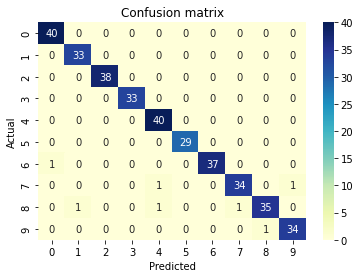

In [ ]:
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
scores=metrics.classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        33
           4       0.95      1.00      0.98        40
           5       1.00      1.00      1.00        29
           6       1.00      0.97      0.99        38
           7       0.97      0.94      0.96        36
           8       0.97      0.92      0.95        38
           9       0.97      0.97      0.97        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# **Non-linear Models - Poly Kernel**

In [ ]:
non_linear_model_poly = SVC(kernel='poly', degree=8)
non_linear_model_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred = non_linear_model_poly.predict(X_test)
y_pred

array([8, 1, 4, 0, 5, 5, 6, 6, 1, 6, 7, 0, 6, 3, 3, 0, 0, 8, 7, 9, 5, 5,
       9, 1, 9, 7, 4, 0, 2, 7, 0, 7, 0, 9, 5, 3, 8, 3, 2, 0, 8, 4, 6, 3,
       0, 9, 6, 9, 1, 6, 0, 6, 4, 6, 0, 5, 1, 2, 2, 3, 0, 8, 8, 0, 4, 8,
       3, 8, 0, 6, 4, 0, 0, 8, 5, 6, 4, 7, 4, 3, 2, 7, 4, 3, 4, 0, 9, 1,
       8, 9, 2, 8, 4, 2, 4, 9, 3, 4, 0, 7, 2, 9, 9, 2, 1, 8, 8, 6, 4, 7,
       6, 9, 3, 7, 0, 9, 4, 2, 9, 8, 1, 6, 2, 4, 6, 4, 0, 9, 4, 0, 1, 2,
       5, 9, 9, 1, 7, 6, 0, 8, 5, 8, 6, 3, 1, 3, 1, 1, 3, 9, 1, 1, 2, 7,
       8, 7, 4, 5, 8, 2, 5, 7, 3, 3, 9, 1, 9, 0, 2, 7, 2, 3, 0, 8, 8, 3,
       2, 9, 4, 4, 5, 4, 8, 4, 8, 3, 7, 4, 2, 9, 4, 7, 5, 0, 3, 5, 3, 1,
       9, 4, 0, 3, 3, 7, 3, 3, 6, 7, 6, 3, 8, 4, 2, 0, 7, 2, 1, 5, 9, 8,
       0, 3, 2, 5, 7, 2, 8, 9, 6, 0, 8, 8, 7, 3, 6, 7, 0, 5, 6, 5, 0, 0,
       1, 1, 8, 8, 2, 2, 0, 2, 4, 1, 8, 7, 9, 4, 1, 2, 4, 1, 9, 1, 9, 5,
       7, 4, 6, 0, 8, 6, 6, 2, 2, 4, 0, 5, 4, 4, 1, 0, 6, 0, 4, 2, 6, 5,
       6, 1, 5, 6, 0, 3, 5, 1, 9, 9, 0, 8, 5, 7, 8,

In [ ]:
# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.975


In [ ]:
# cm
print(metrics.confusion_matrix(y_test, y_pred))

[[40  0  0  0  0  0  0  0  0  0]
 [ 1 32  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  1  0  0]
 [ 0  0  0 32  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0 34  2  0]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


In [ ]:
scores=metrics.classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.97      0.97      0.97        33
           2       1.00      0.97      0.99        38
           3       0.97      0.97      0.97        33
           4       1.00      1.00      1.00        40
           5       1.00      0.97      0.98        29
           6       1.00      0.97      0.99        38
           7       0.97      0.94      0.96        36
           8       0.88      0.97      0.93        38
           9       1.00      0.97      0.99        35

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



# **Non-linear Models - RBF Kernel**

In [ ]:
non_linear_model = SVC(kernel='rbf')
# fit
non_linear_model.fit(X_train, y_train)

SVC()

In [ ]:
# predict
y_pred = non_linear_model.predict(X_test)
y_pred

array([8, 1, 4, 0, 5, 5, 6, 6, 1, 6, 7, 1, 6, 3, 3, 0, 0, 8, 7, 9, 5, 5,
       9, 1, 9, 7, 4, 0, 2, 7, 0, 2, 0, 9, 5, 3, 8, 3, 2, 0, 8, 4, 6, 3,
       0, 9, 6, 9, 1, 6, 0, 6, 4, 6, 0, 5, 1, 2, 2, 3, 0, 8, 8, 0, 4, 8,
       3, 8, 0, 6, 4, 0, 0, 8, 5, 6, 4, 7, 4, 3, 2, 7, 4, 3, 4, 0, 9, 1,
       8, 9, 2, 8, 4, 2, 4, 9, 3, 4, 0, 7, 2, 9, 9, 2, 1, 8, 8, 6, 4, 7,
       6, 9, 3, 7, 0, 9, 4, 2, 9, 8, 1, 6, 2, 4, 6, 4, 0, 9, 4, 0, 1, 2,
       5, 9, 9, 1, 7, 6, 0, 8, 5, 8, 6, 3, 1, 3, 1, 1, 3, 9, 1, 1, 2, 7,
       8, 7, 4, 5, 8, 2, 5, 7, 3, 3, 9, 1, 9, 0, 2, 7, 2, 3, 0, 8, 8, 3,
       2, 9, 4, 4, 5, 4, 8, 4, 8, 3, 7, 4, 2, 9, 4, 7, 5, 0, 3, 5, 3, 1,
       9, 4, 0, 3, 5, 7, 3, 3, 6, 7, 6, 3, 8, 4, 2, 0, 7, 2, 1, 5, 9, 8,
       0, 3, 2, 5, 7, 2, 8, 9, 6, 0, 8, 8, 7, 3, 6, 7, 0, 5, 6, 5, 0, 0,
       1, 1, 8, 6, 2, 2, 0, 2, 4, 1, 8, 7, 9, 4, 1, 2, 4, 1, 9, 1, 9, 5,
       7, 4, 6, 0, 7, 6, 6, 2, 2, 4, 0, 5, 4, 4, 1, 0, 6, 0, 4, 2, 6, 5,
       6, 1, 5, 6, 0, 3, 5, 1, 9, 9, 0, 8, 5, 7, 8,

In [ ]:
# accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9916666666666667


In [ ]:
# cm
print(metrics.confusion_matrix(y_test, y_pred))

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


In [ ]:
scores=metrics.classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        40
           5       0.97      1.00      0.98        29
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        36
           8       0.95      0.97      0.96        38
           9       1.00      0.97      0.99        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

